C:\Users\Shamil\anaconda3\envs\ML_Project\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's l2: 8.03698e+07	valid_0's l2: 6.70322e+07
[40]	training's l2: 6.26433e+07	valid_0's l2: 6.99229e+07
[60]	training's l2: 5.33503e+07	valid_0's l2: 7.13303e+07
[80]	training's l2: 4.81995e+07	valid_0's l2: 7.2013e+07
[100]	training's l2: 4.40563e+07	valid_0's l2: 7.25267e+07
Training accuracy 0.6411
Testing accuracy -0.0991


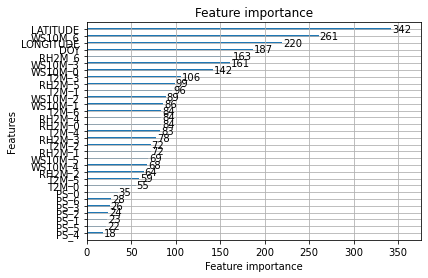

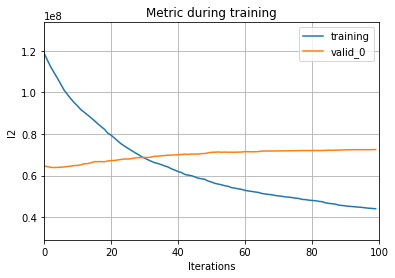

In [42]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('Data_final.csv')
data.head()

# To define the input and output feature
x = data.drop(['FIRE_SIZE','DISCOVERY_DATE','DUR','ID'],axis=1)
y = data.FIRE_SIZE
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model = lgb.LGBMRegressor(learning_rate=0.1,max_depth=-5,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

lgb.plot_importance(model)
lgb.plot_metric(model)

model.booster_.save_model("wildfire_detector.model")